In [ ]:
import os
os.makedirs("modular", exist_ok=True)

In [ ]:
import zipfile
from pathlib import Path
data_path = Path("Images")
path = data_path/"Images"
with zipfile.ZipFile("Images.zip") as zref:
  zref.extractall(data_path)

In [ ]:
import os
def walk_through(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f" Total files {len(filenames)} in directory {len(dirnames)}")

In [ ]:
walk_through(data_path)

 Total files 0 in directory 1
 Total files 0 in directory 46
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 2000 in directory 0
 Total files 20

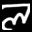

In [ ]:
import torch
from PIL import Image
import random
import numpy as np

image_path_list = list(data_path.glob("*/*/*.png"))
random_image_path = random.choice(image_path_list)
img = Image.open(random_image_path)
img

In [ ]:





img1 = np.array(img)

In [ ]:
img1.shape

(32, 32)

In [ ]:
from torch.utils.data import DataLoader, random_split
from torchvision import datasets , transforms

data_transform = transforms.Compose([
     transforms.Grayscale(num_output_channels=1),
     transforms.ToTensor()

 ])

data = datasets.ImageFolder(root = path , transform = data_transform)

train_set =0.8*len(data)
train_set = int(train_set)
test_set = len(data)- (train_set)

train_data, test_data = random_split(data, [train_set, test_set])

In [ ]:
len(data)

92000

In [ ]:

0.8*len(data)

73600.0

In [ ]:
len(train_data), len(test_data)

(73600, 18400)

In [ ]:

data.classes

['character_01_ka',
 'character_02_kha',
 'character_03_ga',
 'character_04_gha',
 'character_05_kna',
 'character_06_cha',
 'character_07_chha',
 'character_08_ja',
 'character_09_jha',
 'character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [ ]:
image, label = train_data[0]

In [ ]:
image.shape, label

(torch.Size([1, 32, 32]), 8)

Image shape is :torch.Size([1, 32, 32])


(-0.5, 31.5, 31.5, -0.5)

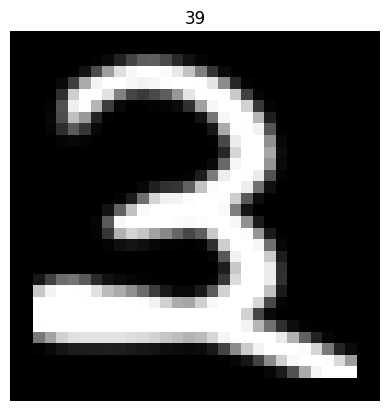

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[6]
print(f"Image shape is :{image.shape}")
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(label)
plt.axis(False)

In [ ]:
#Making dataloader
train_dataloader = DataLoader(train_data, batch_size = 32, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 32, shuffle = False)


In [ ]:
train_features, train_labels = next(iter(train_dataloader))
train_labels

tensor([27, 29, 30, 13, 44, 40, 27, 28, 10,  1, 33, 10, 26, 34,  5, 43, 22, 10,
        40, 17, 17, 40, 24, 23, 27, 35, 20, 28, 45, 28, 19, 13])

In [ ]:
%%writefile modular/data.py
"""
there are functions for createw data loaders
"""

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split

import random

def create_dataloaders(path, data_transform, Batch_size, Num_workers):
  """
  This functions helps to create datasert for model

  Args:
  path: it is a path where our datset is located
  data_transfor: transform function which transform the data into required shape and size or to tensor
  Batch_size = this gives the sample per epoch which we give in model
  Num_workers: This gives the workers thart are working for solving
  """

  data = datasets.ImageFolder(root = path, transform = data_transform)
  train_set = int(0.8 *(len(data)))
  test_set = len(data) - train_set
  train_data, test_data = random_split(data,[train_set, test_set] )

  train_dataloader = DataLoader(train_data, batch_size= Batch_size , shuffle = False)
  test_dataloader = DataLoader(test_data,batch_size = Batch_size , shuffle = False )
  class_names = data.classes

  return train_dataloader, test_dataloader, class_names


Overwriting modular/data.py


In [ ]:
from torch import nn
class nepali_digit_model(nn.Module):
  def __init__(self, input_shape = 1, hidden_units =int, output_shape =int):
    super().__init__()
    self.stack1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.stack2 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*16*16,
                      out_features = output_shape))


  def forward(self, x):
    x =self.stack1(x)

    x  = self.stack2(x)

    return x


In [ ]:
%%writefile modular/make_model.py
"""
This is usedf to create model for nepali_digit_recognition
"""
from torch import nn
class nepali_digit_model(nn.Module):
  def __init__(self, input_shape , hidden_units, output_shape):
    """
    This helps to classify yhe neplai letters

    Args:
    input_shape: This takes the integers indicatingf input channels
    output_shape: This takes the intehers indicating output_channes
    hidden_units: this takes the integer indicating the number of channels in hidden units

    Return:
    This returns the value after pssinhg to the model
    """
    super().__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels =hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2))
    self.layer2 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*16*16, out_features = output_shape))

  def forward(self,x):
    x = self.layer1(x)
    x = self.layer2(x)
    return x



Writing modular/make_model.py


In [ ]:
len(data.classes)

46

In [ ]:
torch.manual_seed(42)
model_0 = nepali_digit_model(input_shape = 1, hidden_units =10, output_shape = len(data.classes))

In [ ]:
image_tensor = torch.rand(size = (1,32,32))
image_tensor

tensor([[[0.5195, 0.1572, 0.2603,  ..., 0.8388, 0.5287, 0.1229],
         [0.3572, 0.2246, 0.3404,  ..., 0.1892, 0.9342, 0.5572],
         [0.8627, 0.4715, 0.5883,  ..., 0.0482, 0.7003, 0.8817],
         ...,
         [0.2345, 0.5668, 0.4769,  ..., 0.1294, 0.9325, 0.9284],
         [0.9958, 0.3222, 0.1313,  ..., 0.7009, 0.4710, 0.4126],
         [0.1678, 0.0348, 0.8152,  ..., 0.9901, 0.2956, 0.7620]]])

In [ ]:
model_0(image_tensor.unsqueeze(dim =0 ))

tensor([[-0.0249,  0.0027, -0.0495, -0.0093, -0.0212,  0.0263, -0.0783, -0.0308,
         -0.0432,  0.0490, -0.1177, -0.0194,  0.0266,  0.0264,  0.0418,  0.0687,
         -0.0073,  0.0338,  0.0301, -0.0015,  0.0411,  0.0199, -0.0111, -0.0297,
         -0.0026,  0.0210,  0.0158,  0.0013, -0.0456,  0.0198, -0.0166, -0.0150,
         -0.0056,  0.0329, -0.0693,  0.0448,  0.0554,  0.0183,  0.0786,  0.0497,
          0.1225,  0.0177, -0.0076, -0.0319,  0.1049, -0.0635]],
       grad_fn=<AddmmBackward0>)

In [ ]:
def train_step(model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer
               ):
  train_loss, train_acc = 0, 0
  model.train()
  for batch , (X,y) in enumerate(train_dataloader):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_prob = torch.argmax(y_pred , dim = 1)
    train_acc +=(y_pred_prob == y).sum().item()/ len(y_pred_prob)

  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)

  return train_loss, train_acc



In [ ]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              optimizer: torch.optim.Optimizer):
  test_loss , test_acc = 0, 0
  model.eval()
  for batch, (X,y) in enumerate(dataloader):
    test_pred = model(X)
    loss = loss_fn(test_pred, y)
    test_loss+=loss
    test_pred_prob = torch.argmax(test_pred, dim =1 )
    test_acc += (test_pred_prob == y).sum().item()/len(test_pred_prob)

  test_acc=test_acc/len(dataloader)
  test_loss = test_loss/len(dataloader)


  return test_loss, test_acc


In [ ]:
from tqdm.auto import tqdm
def train(model:torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn : torch.nn.Module,
          optimizer: torch.optim.Optimizer):
  epochs = 5
  model1={"train_loss":[],
         "train_acc":[],
         "test_loss":[],
         "test_acc":[]}

  for epoch in tqdm(range(epochs)):

    train_loss, train_accuracy = train_step(
        model= model,
        dataloader = train_dataloader,
        loss_fn = loss_fn,
        optimizer = optimizer
    )
    test_loss, test_accuracy = test_step(model = model,
                                         dataloader = test_dataloader,
                                         loss_fn = loss_fn,
                                         optimizer = optimizer)

    print(f" In epoch :{epoch} |train_loss:{train_loss:.4f} | train_acc :{train_accuracy:.4f} | test_loss;{test_loss:.4f} | test_Acc:{test_accuracy:.4f} ")

    model1["train_loss"].append(train_loss)
    model1["train_acc"].append(train_accuracy)
    model1["test_loss"].append(test_loss)
    model1["test_acc"].append(test_accuracy)



In [ ]:
%%writefile modular/engine.py
import torch
def train_step(model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer
               ):
  """
  This function is used to train the model form the dataset

  Args:
  model:This is the object of model for training the data
  dataloader: this consists of dataloader for training
  loss_fn: this helps to calculate the loss
  optimizer: this is used for optimization

  Return:
  This function returns the training and testing loss
  """
  train_loss, train_acc = 0, 0
  model.train()
  for batch , (X,y) in enumerate(dataloader):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_prob = torch.argmax(y_pred , dim = 1)
    train_acc +=(y_pred_prob == y).sum().item()/ len(y_pred_prob)

  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)

  return train_loss, train_acc


def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              optimizer: torch.optim.Optimizer):
  test_loss , test_acc = 0, 0
  model.eval()
  for batch, (X,y) in enumerate(dataloader):
    test_pred = model(X)
    loss = loss_fn(test_pred, y)
    test_loss+=loss
    test_pred_prob = torch.argmax(test_pred, dim =1 )
    test_acc += (test_pred_prob == y).sum().item()/len(test_pred_prob)

  test_acc=test_acc/len(dataloader)
  test_loss = test_loss/len(dataloader)


  return test_loss, test_acc


from tqdm.auto import tqdm
def train(model:torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn : torch.nn.Module,
          optimizer: torch.optim.Optimizer):
  epochs = 5
  model1={"train_loss":[],
         "train_acc":[],
         "test_loss":[],
         "test_acc":[]}

  for epoch in tqdm(range(epochs)):

    train_loss, train_accuracy = train_step(
        model= model,
        dataloader = train_dataloader,
        loss_fn = loss_fn,
        optimizer = optimizer
    )
    test_loss, test_accuracy = test_step(model = model,
                                         dataloader = test_dataloader,
                                         loss_fn = loss_fn,
                                         optimizer = optimizer)

    print(f" In epoch :{epoch} |train_loss:{train_loss:.4f} | train_acc :{train_accuracy:.4f} | test_loss;{test_loss:.4f} | test_Acc:{test_accuracy:.4f} ")

    model1["train_loss"].append(train_loss)
    model1["train_acc"].append(train_accuracy)
    model1["test_loss"].append(test_loss)
    model1["test_acc"].append(test_accuracy)

  return model1








Writing modular/engine.py


In [ ]:
%%writefile modular/utils.py
from pathlib import Path
import torch
from torch import nn

def model_save(model:nn.Module,
               target_dir: str,
               ):
  targ_dir_path = Path(target_dir)
  targ_dir_path.mkdir(parents = True, exists_ok = True)
  model_name= "nepali_letter.pth"
  model_save_path = targ_dir_path/model_name
  print(f"Saving model to:{model_save_path}")
  torch.save(obj = model.state_dict(), f = model_save_path)


Writing modular/utils.py


In [ ]:
torch.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

train(model= model_0,
      train_dataloader = train_dataloader,
      test_dataloader = test_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer)

  0%|          | 0/5 [00:00<?, ?it/s]

 In epoch :0 |train_loss:0.7444 | train_acc :0.7971 | test_loss;0.3336 | test_Acc:0.9033 
 In epoch :1 |train_loss:0.2309 | train_acc :0.9316 | test_loss;0.2655 | test_Acc:0.9240 
 In epoch :2 |train_loss:0.1541 | train_acc :0.9540 | test_loss;0.2554 | test_Acc:0.9285 
 In epoch :3 |train_loss:0.1184 | train_acc :0.9644 | test_loss;0.2179 | test_Acc:0.9395 
 In epoch :4 |train_loss:0.0941 | train_acc :0.9708 | test_loss;0.2655 | test_Acc:0.9321 


In [ ]:
from tqdm.auto import tqdm
y_preds= []
y_true=[]
model_0.eval()
with torch.inference_mode():
 for X,y in tqdm(test_dataloader):
   y_logit = model_0(X)
   y_pred = torch.argmax(y_logit, dim =1 )
   y_preds.append(y_pred)
   y_true.append(y)

y_true_tensor=torch.cat(y_true)
y_pred_tensor = torch.cat(y_preds)

  0%|          | 0/575 [00:00<?, ?it/s]

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat =  ConfusionMatrix(task = "Multiclass", num_classes = len(data.classes))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = y_true_tensor)

In [ ]:

!pip install torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 16.5 MB/s eta 0:00:00


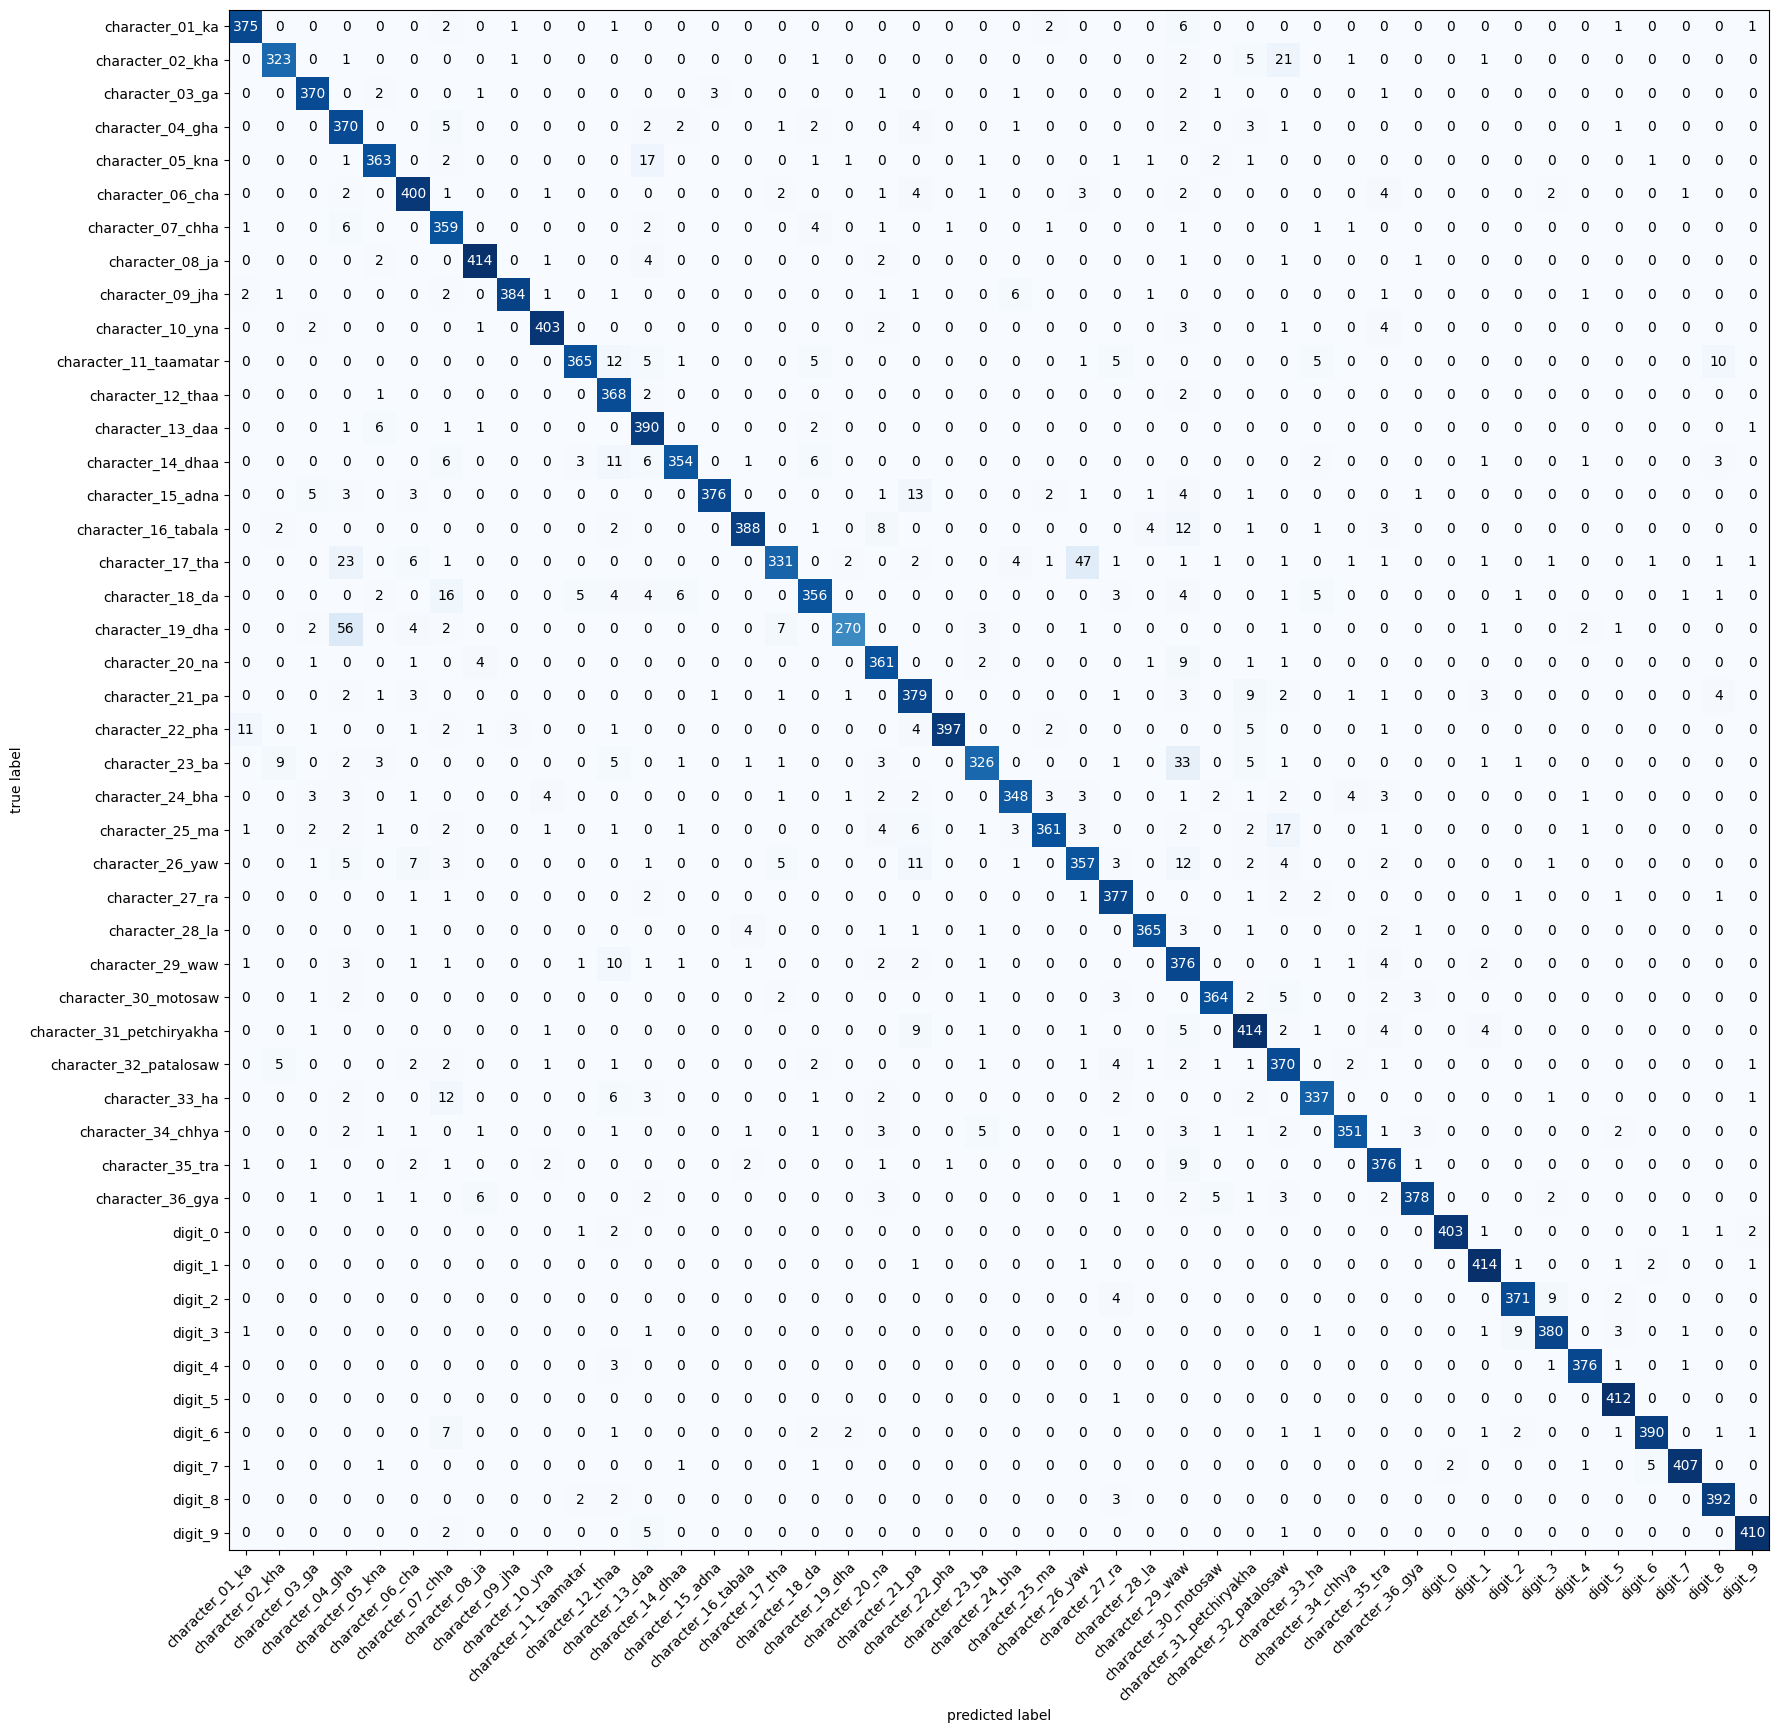

In [ ]:
fig , ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = data.classes,
    figsize= (20,20)
)

In [ ]:
!apt-get install git

In [ ]:
!git clone https://github.com/Sujal261/Nepali_Letter_Recognition.git

In [ ]:
%%writefile modular/train.py

import os
import torch
import data, make_model, engine, utils

from torchvision import transforms

NUM_EPOCHS = 5
Batch_size= 32
Hidden_units = 10
learning_rate = 0.01
Num_Workers = os.cpu_count()

path = "Images/Images"

data_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
     transforms.ToTensor()
])
train_dataloader, test_dataloader, class_names = data.create_dataloaders(path = path, data_transform = data_transforms, Batch_size = Batch_size, Num_workers = Num_Workers)
model = make_model.nepali_digit_model( input_shape =1,
                                      hidden_units = Hidden_units,
                                       output_shape = len(class_names)
                                      )

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

engine.train(model = model,
             train_dataloader = train_dataloader,
             test_dataloader = test_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             )
utils.save_model(model = model,
                 target_dir = "models",
                 )

In [ ]:
test_data[0]

(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]),
 15)

Image shape is :torch.Size([1, 32, 32])


16

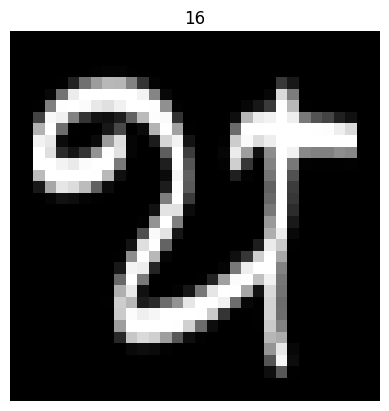

In [ ]:
import matplotlib.pyplot as plt
image,label = test_data[9]
print(f"Image shape is :{image.shape}")
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(label)
plt.axis(False)
label

In [ ]:
y_logit = model_0(image.unsqueeze(dim =1))
y_true=torch.argmax(y_logit)
y_true

tensor(16)